<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 4 Naive Bayes
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4> 
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [ ]:
# Set your student number
student_number = 98101822
Name = 'یلدا'
Last_Name = 'شعبان زاده'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys

address = 'AI/MPQ4/Practical'
sys.path.append(f'content/drive/MyDrive/{address}')

% cd /content/drive/MyDrive/$address

/content/drive/MyDrive/AI/MPQ4/Practical


# Rules
- You **are** allowed to add or remove cells.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.

In [ ]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./Q1.ipynb")
with open(f'python_code_Q1_{student_number}.py', 'w') as file:
    file.write(python_code)

your file will be graded


# Gaussian Naive Bayes (40 Points)

<font size=4>
Author: Kimia Noorbakhsh
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

In this assignment, you are going to implement a Naive Bayes Classifier for the MNIST Dataset (Well, of course, **from scratch**!). The MNIST data set is a vast database of handwritten digits that is commonly used to form various image processing systems. 

Please note the following before you continue:
- After implementing your Classifier, train your model on the **train** section of the MNIST dataset and validate your model by testing it on the test set.
- Note that if you use any of the **test** images during training or for improving the accuracy, you will not earn any points for this assignment. 
- Do not forget to use **Laplace Smoothing** to avoid overfitting.

Recall Bayes rule:
    $$P(c|x) =  \frac{P(x|c)P(c)}{P(x)} \;\;\;\;(1)$$
    
Here $x$ stands for the image, or more precisely, the pixel values of the formatted image as a vector, and $c$ stands for the number, which can be 0, 1, ..., 9. We can read the left side $P(c|x)$ as "the probability of the class being $c$ given the $x$" data (posterior). We can read the right side $P(x|c)$ as "the probability of $x$ data being in the $c$" class (likelihood). We care about the value of $c$. It tells us "what number" this picture is. The chosen class is simply the one with the highest probability for this data:
$$c^* = argmax_{c}P(c|x)$$
Now, we can ignore $P(x)$ in equation (1) (It has a fixed value). Using this information, we can simplify our problem so that, in order to choose “which digit” given an image, all we need to do is calculate this argmax (P(x) is removed):
$$c^* = argmax_{c}P(x|c)P(c)$$
Now, we need to think about how to calculate $P(c)$, and $P(x|c)$. We leave this section for you to think about ^_^. But as a guide for $P(x|c)$, read the following. 

Remember that pixels represent the intensity of light, and that the intensity of light is in fact continuous. A first reasonable estimation to model continuous data is the multivariate Gaussian or multivariate Normal. We can write:
$$P(x|c) = \frac{1}{\sqrt{(2\pi)^{D}|\Sigma|}}\exp(-\frac{1}{2}(x - \mu)^{T}\Sigma^{-1}(x-\mu))$$
Note that because probabilities are very small when dimensionality is high, we are going to work with log-probability rather than probability. So instead of getting numbers that are very close to 0, which is inaccurate when you use a computer to represent them, we're just going to get negative numbers. The log-probability can be represented as ($D$ is the dimentionality):
$$\log{P(x|c) = -\frac{D}{2}\ln(2\pi)-\frac{1}{2}\ln|\Sigma|-\frac{1}{2}(x - \mu)^{T}\Sigma^{-1}(x-\mu)}$$
To calculate $\mu$ and $\Sigma$, you can use the **sample** mean and covariance (see [here.](https://en.wikipedia.org/wiki/Sample_mean_and_covariance)) Also note that to get the argmax over $P(x|c)P(c)$, we can choose the digit class using:
$$c^* = argmax_{c}(\log P(x|c)+\log P(c))$$
Now, let's dive into implementing a **Gaussian Naive Bayes Classifier.**

## Loading data

For your convineince, use the following cells to access the data. 

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets
from scipy.stats import multivariate_normal

In [ ]:
train_data = datasets.MNIST('./data', train=True, download=True)
test_data  = datasets.MNIST('./data', train=False, download=True)

train_images = np.array(train_data.data)
train_labels = np.array(train_data.targets)
test_images = np.array(test_data.data)
test_labels = np.array(test_data.targets)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



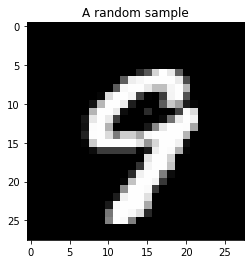

In [ ]:
plt.imshow(train_images[random.randint(1, 1000)], cmap='Greys_r')
plt.title('A random sample')
plt.show()

## Training the Model

In [ ]:
class Bayes:

    IMAGE_SIZE = 28 * 28

    def __init__(self, smoothing):
        self.gaussian = {}
        self.label_pros = {}
        self.smoothing = smoothing
    
    def _train_label(self, label, train_images, train_labels):
        images = train_images[train_labels == label]
        mean = np.mean(images, axis=0)
        cov = np.cov(images.T) + np.eye(self.IMAGE_SIZE) * self.smoothing
        return mean, cov
    
    @classmethod
    def _label_prob(cls, label, train_labels):
        return np.mean(train_labels == label)

    def train(self, train_images, train_labels):
        train_images = train_images.reshape((-1, self.IMAGE_SIZE))
        self.labels = set(train_labels)

        for label in self.labels:
            mean, cov = self._train_label(label, train_images, train_labels)
            self.gaussian[label] = (mean, cov)
            self.label_pros[label] = self._label_prob(label, train_labels)


    def calc_accuracy(self, images, labels):
        return np.mean(self.predict_labels(images) == labels)

    def predict_labels(self, images):
        assert len(self.gaussian) != 0
    
        images = images.reshape((-1, self.IMAGE_SIZE))
        predicts = np.zeros((len(self.labels), images.shape[0]))

        for label, info in self.gaussian.items():
            mean, cov = info
            predicts[label] = (
                multivariate_normal.logpdf(images, mean=mean, cov=cov)
                + np.log(self.label_pros[label])
            )
        
        return np.argmax(predicts, axis=0)

In [ ]:
network = Bayes(smoothing=1000)
network.train(train_images, train_labels)

## Model Evaluation

In [ ]:
print("Accuracy on test data (%) : " + str(network.calc_accuracy(test_images, test_labels) * 100))

Accuracy on test data (%) : 95.11
